In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

C:\Users\bhave\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Dynamicallly plot the graph for Train and Test Loss

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plot_dynamic(x, y, y_1, ax, ticks, title, colors=['b']):
    ax.plot(x, y, 'b', label = 'Train Loss')
    ax. plot(x, y_1, 'r', label = "Test loss")
    if len(x)==1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

In [3]:
# Define Network Parameters

n_hidden_1 = 512  # number of neurons for first hidden layer
n_hidden_2 = 128  # number of neurons for second hidden layer
n_input = 784     # MNIST data input features. (image size: 28 * 28)
n_classes = 10    # Total number of classes (0-9 digits)

training_epochs = 15
learning_rate = 0.001
batch_size = 100
display_step = 1

In [4]:
# Define placeholders for computation

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

In [5]:
# Weight Initialization for Sigmoid function

# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(fan_in+fan_out+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(fan_in+fan_out+1) = 0.055  => N(0,σ) = N(0,0.055)
# out =>  σ=√(2/(fan_in+fan_out+1) = 0.120  => N(0,σ) = N(0,0.120)
# SGD: Xavier/Glorot Normal initialization.

weights_sgd = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev = 0.039, mean =0)),     # 784x512
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev = 0.125, mean = 0)),  # 512x128
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev = 0.120, mean = 0))  # 128x10
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),    #512x1
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),    #128x1
    'out': tf.Variable(tf.random_normal([n_classes]))     #10x1
}

### MODEL 1: Input(784) - Sigmoid(512) - Sigmoid(128) - Softmax(output 10)

In [6]:
# Create Model

def multilayer_perceptron(x, weights, biases):
    print('x:', x.get_shape(), 'W[h1]: ', weights['h1'].get_shape(), 'b[h1]: ', biases['b1'].get_shape())
    
    # Hidden layer 1 with Sigmoid Activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])    #(x*weights['h1']) + biases['b1']
    layer_1 = tf.nn.sigmoid(layer_1)
    print("layer_1: ", layer_1.get_shape(), 'W[h2]: ', weights['h2'].get_shape(), 'b[h2]: ', biases['b2'].get_shape())
    
    # Hidden layer 1 with Sigmoid Activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])  # (layer_1 * weights['h2']) + biases['b2']
    layer_2 = tf.nn.sigmoid(layer_2)
    print('layer_2: ', layer_2.get_shape(), 'W[out]: ', weights['out'].get_shape(), 'b3: ', biases['out'].get_shape())
    
    # Output layer with Sigmoid activation
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])  # (layer_2 * weights['out']) + biases['out']
    out_layer = tf.nn.sigmoid(out_layer)
    print('out_layer: ', out_layer.get_shape())
    
    return out_layer

### MODEL 1 + ADAM OPTIMIZER

x: (?, 784) W[h1]:  (784, 512) b[h1]:  (512,)
layer_1:  (?, 512) W[h2]:  (512, 128) b[h2]:  (128,)
layer_2:  (?, 128) W[out]:  (128, 10) b3:  (10,)
out_layer:  (?, 10)


<IPython.core.display.Javascript object>


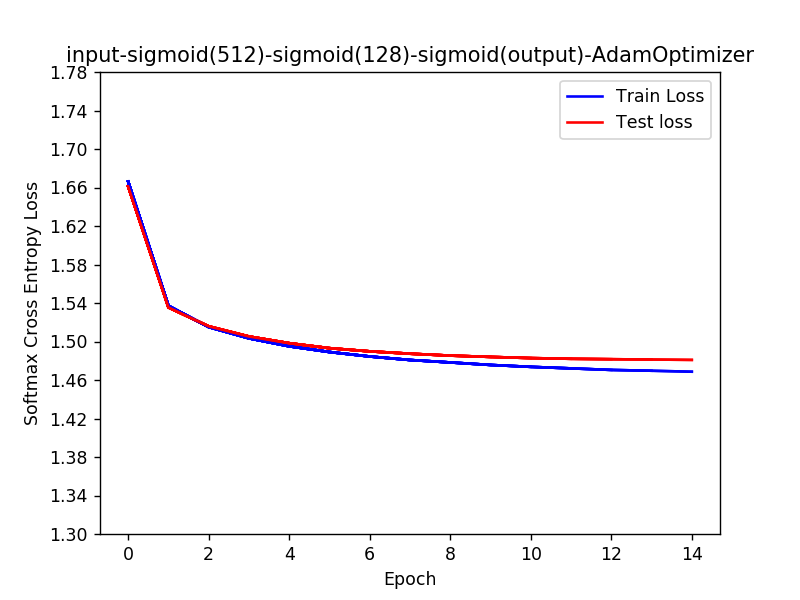

Epoch: 0001 train cost=1.666110185 test cost=1.660980421
Epoch: 0002 train cost=1.537109341 test cost=1.535400845
Epoch: 0003 train cost=1.515005429 test cost=1.515767009
Epoch: 0004 train cost=1.503302003 test cost=1.505207067
Epoch: 0005 train cost=1.495024207 test cost=1.498229560
Epoch: 0006 train cost=1.489070369 test cost=1.493064121
Epoch: 0007 train cost=1.484421057 test cost=1.489771713
Epoch: 0008 train cost=1.480780581 test cost=1.487320096
Epoch: 0009 train cost=1.478241494 test cost=1.485338939
Epoch: 0010 train cost=1.475635729 test cost=1.483990214
Epoch: 0011 train cost=1.473666394 test cost=1.482771514
Epoch: 0012 train cost=1.472074215 test cost=1.482025123
Epoch: 0013 train cost=1.470463113 test cost=1.481616045
Epoch: 0014 train cost=1.469619454 test cost=1.481264034
Epoch: 0015 train cost=1.468609649 test cost=1.480871810
Accuracy:  0.9797


In [48]:
y_sgd = multilayer_perceptron(x, weights_sgd, biases)

cost_sgd = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_sgd, labels = y_))

optimizer_adam = tf.train.AdamOptimizer(learning_rate).minimize(cost_sgd)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('Epoch'); ax.set_ylabel('Softmax Cross Entropy Loss')
    xs, ytrs, ytes = [], [], []
    
    # loop over epoches
    for epoch in range(training_epochs):
        train_avg_cost =0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/ batch_size)
        
        # loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c, w = sess.run([optimizer_adam, cost_sgd, y_sgd], feed_dict = {x: batch_x, y_: batch_y})
            # c is the cost after each batch
            # w is the corresponding weights
            train_avg_cost += c / total_batch
            c = sess.run(cost_sgd, feed_dict = {x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch
            
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plot_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step= 0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")
        
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plot_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")
            
    # calculate accuracy on test data
    correct_prediction = tf.equal(tf.argmax(y_sgd, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy: ", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

### MODEL 1 + GRADIENT DESCENT OPTIMIZER

x: (?, 784) W[h1]:  (784, 512) b[h1]:  (512,)
layer_1:  (?, 512) W[h2]:  (512, 128) b[h2]:  (128,)
layer_2:  (?, 128) W[out]:  (128, 10) b3:  (10,)
out_layer:  (?, 10)


<IPython.core.display.Javascript object>


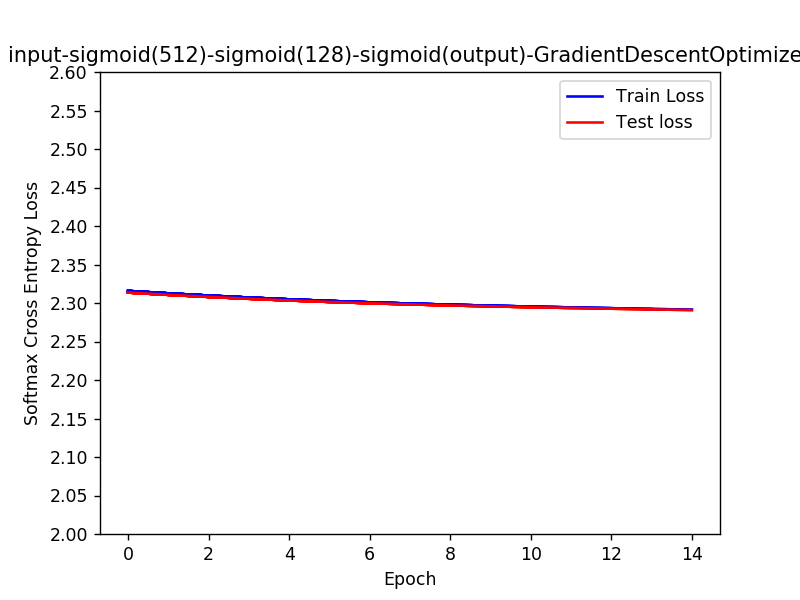

Epoch: 0001 train cost=2.315627715 test cost=2.313583273
Epoch: 0002 train cost=2.312487639 test cost=2.310627854
Epoch: 0003 train cost=2.309620668 test cost=2.307945959
Epoch: 0004 train cost=2.307030289 test cost=2.305545695
Epoch: 0005 train cost=2.304713485 test cost=2.303334985
Epoch: 0006 train cost=2.302658522 test cost=2.301422587
Epoch: 0007 train cost=2.300836823 test cost=2.299733647
Epoch: 0008 train cost=2.299220685 test cost=2.298243643
Epoch: 0009 train cost=2.297779559 test cost=2.296887450
Epoch: 0010 train cost=2.296488505 test cost=2.295694306
Epoch: 0011 train cost=2.295315467 test cost=2.294572705
Epoch: 0012 train cost=2.294236281 test cost=2.293559574
Epoch: 0013 train cost=2.293228967 test cost=2.292609833
Epoch: 0014 train cost=2.292276757 test cost=2.291680621
Epoch: 0015 train cost=2.291365195 test cost=2.290791161
Accuracy:  0.1135


In [8]:
y_sgd = multilayer_perceptron(x, weights_sgd, biases)

cost_sgd = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_sgd, labels = y_))

# Gradient Descent Optimizer is used 
optimizer_sgd = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost_sgd)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('Epoch'); ax.set_ylabel("Softmax Cross Entropy Loss")
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c, w = sess.run([optimizer_sgd, cost_sgd, weights_sgd], feed_dict = {x: batch_x, y_: batch_y})
            train_avg_cost += c / total_batch
            c = sess.run(cost_sgd, feed_dict = {x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch
            
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plot_dynamic(xs, ytrs, ytes, ax, np.arange(2, 2.6, step = 0.05), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-GradientDescentOptimizer")
        
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plot_dynamic(xs, ytrs, ytes, ax, np.arange(2, 2.6, step=0.05), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-GradientDescentOptimizer")

    correct_prediction = tf.equal(tf.argmax(y_sgd, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy: ", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

### MODEL 2: Input(784) - ReLU(512) - ReLU(128) - Softmax(output 10)

In [9]:
# Create Model

def multilayer_perceptron_relu(x, weights, biases):
    print('x: ', x.get_shape(), 'weights[h1]: ', weights['h1'].get_shape(), 'b[h1]: ',biases['b1'].get_shape())
    
    # Hidden Layer 1 with ReLU as Activation 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])   #(x*weights['h1']) + biases['b1']
    layer_1 = tf.nn.relu(layer_1)
    print('layer_1: ', layer_1.get_shape(), 'weights[h2]: ', weights['h2'].get_shape(), 'biases[h2]: ', biases['b2'].get_shape())
    
    # Hidden Layer 2 with ReLU as Activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])   # (layer_1 * weights['h2']) + biases['b2']
    layer_2 = tf.nn.relu(layer_2)
    print('layer_2: ', layer_2.get_shape(), 'weights[out]: ', weights['out'].get_shape(), 'biases[out]: ', biases['out'].get_shape())
    
    # Output Layer with Sigmoid Activation
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])  # (layer_2 * weights['out']) 
    out_layer = tf.nn.sigmoid(out_layer)
    print('out_layer: ', out_layer.get_shape())
    
    return out_layer

### MODEL 2 + ADAM OPTIMIZER

In [10]:
weights_relu = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev = 0.062, mean = 0)),  # 784x512
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev = 0.125, mean = 0)),  # 512x128
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev = 0.120, mean = 0)) #128x10
    
}

x:  (?, 784) weights[h1]:  (784, 512) b[h1]:  (512,)
layer_1:  (?, 512) weights[h2]:  (512, 128) biases[h2]:  (128,)
layer_2:  (?, 128) weights[out]:  (128, 10) biases[out]:  (10,)
out_layer:  (?, 10)


<IPython.core.display.Javascript object>


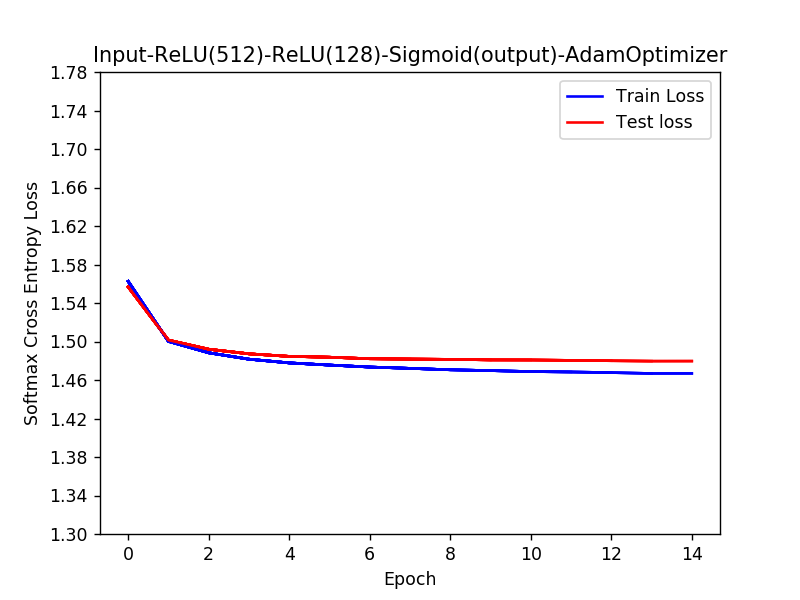

Epoch: 0001 train cost=1.562460318 test cost=1.556702638
Epoch: 0002 train cost=1.500130203 test cost=1.501418106
Epoch: 0003 train cost=1.488261591 test cost=1.491972136
Epoch: 0004 train cost=1.481623191 test cost=1.487200025
Epoch: 0005 train cost=1.477767155 test cost=1.484546999
Epoch: 0006 train cost=1.475523016 test cost=1.483669241
Epoch: 0007 train cost=1.473466632 test cost=1.482091087
Epoch: 0008 train cost=1.472097436 test cost=1.481731953
Epoch: 0009 train cost=1.470614577 test cost=1.481457345
Epoch: 0010 train cost=1.469764358 test cost=1.480887826
Epoch: 0011 train cost=1.468757298 test cost=1.480808648
Epoch: 0012 train cost=1.468343823 test cost=1.480402990
Epoch: 0013 train cost=1.467692324 test cost=1.480009222
Epoch: 0014 train cost=1.466788879 test cost=1.479610067
Epoch: 0015 train cost=1.466845248 test cost=1.479647556
Accuracy:  0.9824


In [46]:
y_relu = multilayer_perceptron_relu(x, weights_relu, biases)
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_relu, labels = y_))
optimizer_relu_adam = tf.train.AdamOptimizer(learning_rate).minimize(cost_relu)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('Epoch'); ax.set_ylabel('Softmax Cross Entropy Loss')
    xs, ytrs, ytes = [], [], []
    
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c, w = sess.run([optimizer_relu_adam, cost_relu, weights_relu], feed_dict = {x: batch_x, y_: batch_y})
            train_avg_cost += c / total_batch
            c = sess.run(cost_relu, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch
            
        xs.append(epoch)    
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plot_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "Input-ReLU(512)-ReLU(128)-Sigmoid(output)-AdamOptimizer")
        
        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    plot_dynamic(xs, ytrs, ytes, ax,np.arange(1.3, 1.8, step=0.04), "input-ReLu(512)-ReLu(128)-sigmoid(output)-AdamOptimizer")

    
    correct_prediction = tf.equal(tf.argmax(y_relu,1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy: ", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

<IPython.core.display.Javascript object>


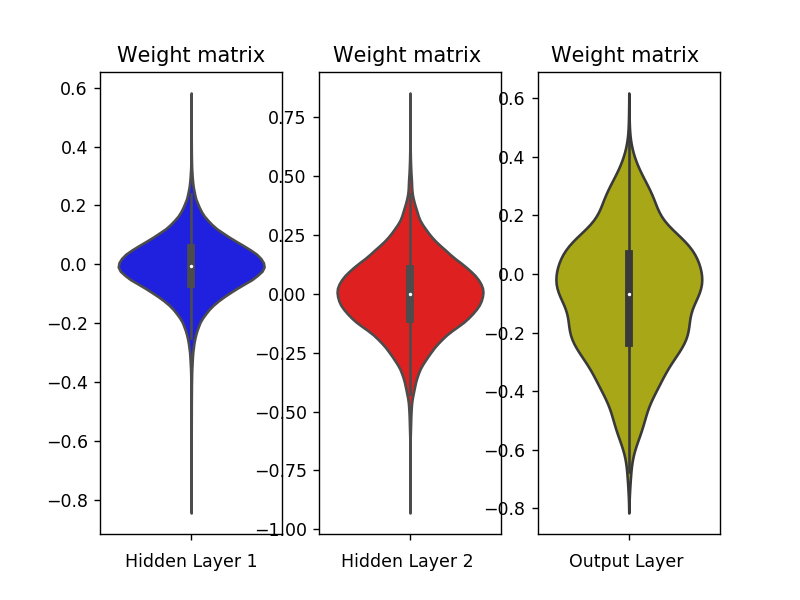

Text(0.5,0,'Output Layer ')

In [47]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')

### MODEL 3: Input - Sigmoid(BatchNormalization(512)) - Sigmoid(BatchNormalization(128)) - Sigmoid(Output)

In [14]:
epsilon = 1e-3
def multilayer_perceptron_batch(x, weights, biases):
    print('x: ', x.get_shape(), 'W[h1]: ', weights['h1'].get_shape(), 'b[h1]: ', biases['b1'].get_shape())
    
    # Hidden layer with Sigmoid activation and batch normalization
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    
    # Calculate mean and variance of x
    batch_mean_1, batch_var_1 = tf.nn.moments(layer_1, [0])
    
    scale_1 = tf.Variable(tf.ones([n_hidden_1]))
    beta_1 = tf.Variable(tf.zeros([n_hidden_1]))
    
    layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon)
    layer_1 = tf.nn.sigmoid(layer_1)
    
    print('layer_1: ', layer_1.get_shape(), 'W[h2]: ', weights['h2'].get_shape(), 'b[h2]: ', biases['b2'].get_shape())
    
    # Hidden layer with Sigmoid activation and batch normalization
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    
    # Calculate mean and variance of layer_1 as input
    batch_mean_2, batch_var_2 = tf.nn.moments(layer_2, [0])
    
    scale_2 = tf.Variable(tf.ones([n_hidden_2]))
    beta_2 = tf.Variable(tf.zeros([n_hidden_2]))
    
    layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_2, batch_var_2, beta_2, scale_2, epsilon)
    layer_2 = tf.nn.sigmoid(layer_2)
    
    print('layer_2: ', layer_2.get_shape(), 'W[out]: ', weights['out'].get_shape(), 'b3: ', biases['out'].get_shape())
    
    # OUtput layer with Sigmoid activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    out_layer = tf.nn.sigmoid(out_layer)
    print('out_layer: ', out_layer.get_shape())
    
    return out_layer

### MODEL 3 + ADAM OPTIMIZER

x:  (?, 784) W[h1]:  (784, 512) b[h1]:  (512,)
layer_1:  (?, 512) W[h2]:  (512, 128) b[h2]:  (128,)
layer_2:  (?, 128) W[out]:  (128, 10) b3:  (10,)
out_layer:  (?, 10)


<IPython.core.display.Javascript object>


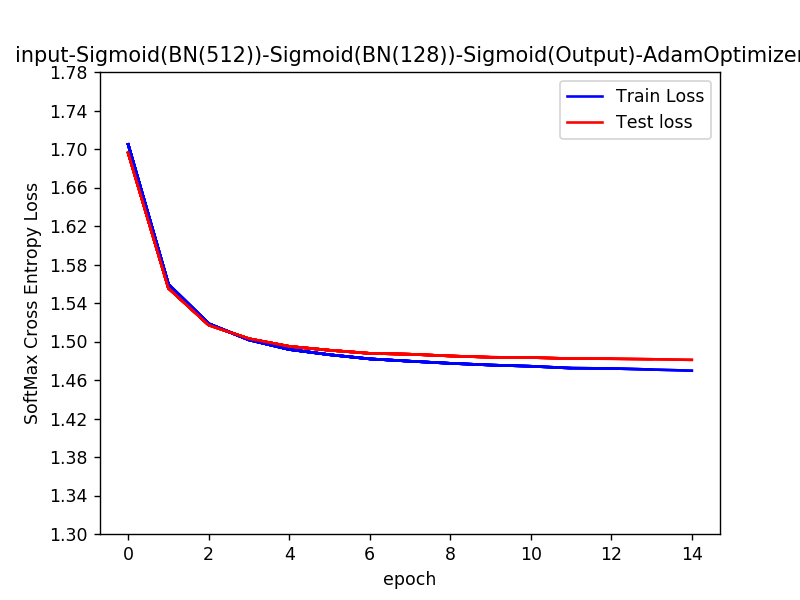

Epoch:  0001 train cost=1.704691961 test cost=1.695961616
Epoch:  0002 train cost=1.559419165 test cost=1.555403231
Epoch:  0003 train cost=1.518488388 test cost=1.517117230
Epoch:  0004 train cost=1.501670626 test cost=1.502870454
Epoch:  0005 train cost=1.491728585 test cost=1.494934291
Epoch:  0006 train cost=1.486267797 test cost=1.490917326
Epoch:  0007 train cost=1.481937656 test cost=1.487676851
Epoch:  0008 train cost=1.479518397 test cost=1.486762196
Epoch:  0009 train cost=1.477325453 test cost=1.484971241
Epoch:  0010 train cost=1.475546935 test cost=1.483641927
Epoch:  0011 train cost=1.474300110 test cost=1.483365900
Epoch:  0012 train cost=1.472338718 test cost=1.482209737
Epoch:  0013 train cost=1.472003754 test cost=1.482091550
Epoch:  0014 train cost=1.470891126 test cost=1.481553752
Epoch:  0015 train cost=1.469664013 test cost=1.480937400
Accuracy:  0.9786


In [19]:
ybatch = multilayer_perceptron_batch(x, weights_sgd, biases)

cost_batch = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ybatch, labels = y_))

optimizer_batch_adam = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost_batch)
optimizer_batch_sgdc = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost_batch)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('epoch'); ax.set_ylabel('SoftMax Cross Entropy Loss')
    
    xs, ytrs, ytes = [], [], []
    
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        
        # loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # Using Adam Optimizer
            _, c, w = sess.run([optimizer_batch_adam, cost_batch, weights_sgd], feed_dict = {x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_batch, feed_dict = {x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch
            
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plot_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step = 0.04), 'input-Sigmoid(BN(512))-Sigmoid(BN(128))-Sigmoid(Output)-AdamOptimizer')
        
        if epoch % display_step == 0:
            print('Epoch: ', '%04d'% (epoch + 1), 'train cost={:.9f}'.format(train_avg_cost), 'test cost={:.9f}'.format(test_avg_cost))
            
    # Plot final result
    plot_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step = 0.04), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Sigmoid(output)-AdamOptimizer")
    
    correct_prediction = tf.equal(tf.argmax(ybatch, 1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy: ', accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

<IPython.core.display.Javascript object>


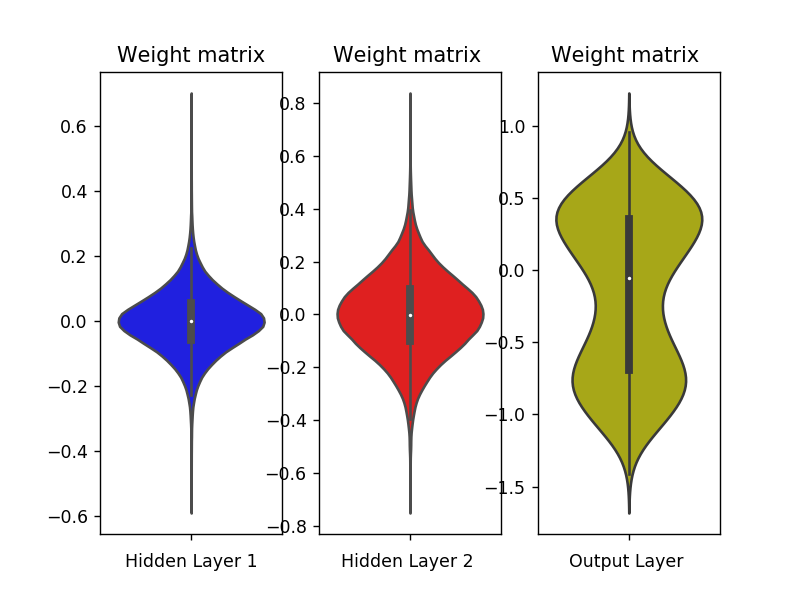

In [21]:
import seaborn as sns

h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Model 3 + GradientDescentOptimizer

<IPython.core.display.Javascript object>


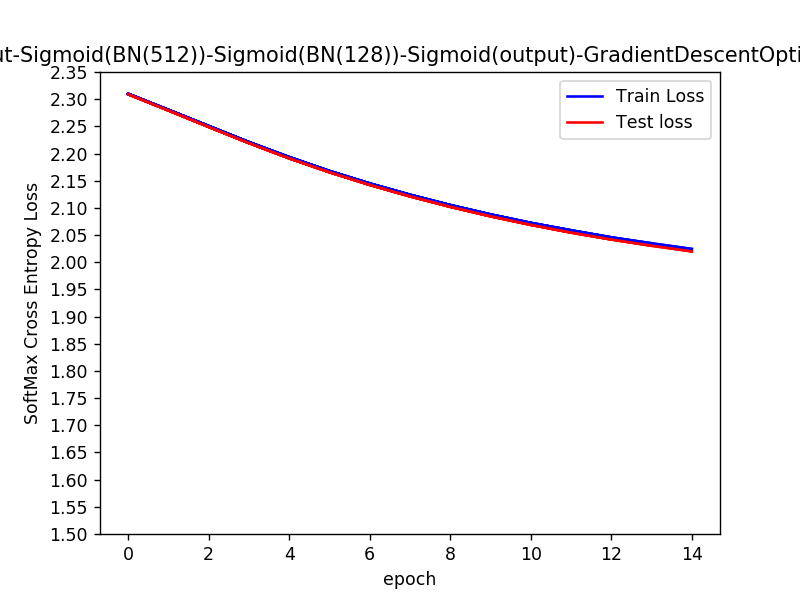

Epoch: 0001 train cost=2.309775107 test cost=2.309203105
Epoch: 0002 train cost=2.280285703 test cost=2.279316546
Epoch: 0003 train cost=2.250537944 test cost=2.249029409
Epoch: 0004 train cost=2.220903951 test cost=2.219310539
Epoch: 0005 train cost=2.193346881 test cost=2.191234361
Epoch: 0006 train cost=2.167779418 test cost=2.165625763
Epoch: 0007 train cost=2.144850359 test cost=2.142352436
Epoch: 0008 train cost=2.124113353 test cost=2.121203009
Epoch: 0009 train cost=2.105140104 test cost=2.102058678
Epoch: 0010 train cost=2.087971475 test cost=2.084587229
Epoch: 0011 train cost=2.072411959 test cost=2.068808260
Epoch: 0012 train cost=2.058747789 test cost=2.054578415
Epoch: 0013 train cost=2.045770702 test cost=2.041818591
Epoch: 0014 train cost=2.034819905 test cost=2.030326469
Epoch: 0015 train cost=2.024439337 test cost=2.019875043
Accuracy:  0.732


In [31]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('epoch'); ax.set_ylabel('SoftMax Cross Entropy Loss')
    
    xs, ytrs, ytes = [], [], []
    
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        
        # loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # Using Gradient Descent Optimizer
            _, c, w = sess.run([optimizer_batch_sgdc, cost_batch, weights_sgd], feed_dict = {x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_batch, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch
        
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plot_dynamic(xs, ytrs, ytes, ax, np.arange(1.5, 2.4, step = 0.05), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Sigmoid(output)-GradientDescentOptimizer")
        
        if epoch % display_step == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'train cost={:.9f}'.format(train_avg_cost), 'test cost={:.9f}'.format(test_avg_cost))
        
    # plot final results
    plot_dynamic(xs, ytrs, ytes, ax, np.arange(1.5, 2.4, step=0.05), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Sigmoid(output)-GradientDescentOptimizer")
    
    
    # Calculating the final accuracy on test data
    correct_prediction = tf.equal(tf.argmax(ybatch, 1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy: ', accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

### MODEL 4: Input - ReLu(512) - Dropout - ReLu(128) - Dropout - Sigmoid(Output)

In [39]:
keep_prob = tf.placeholder(tf.float32)
keep_prob_input = tf.placeholder(tf.float32
                                )
def multilayer_perceptron_dropout(x, weights, biases):
    print('x: ',x.get_shape(), 'W[h1]: ', weights['h1'].get_shape(), 'b[h1]: ', biases['b1'].get_shape())
    
    # Add dropout layer after input layer with parameter keep_prob_input
    
    # Hidden layer 1 with ReLu Activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1_drop = tf.nn.dropout(layer_1, keep_prob)
    
    print('layer_1: ', layer_1.get_shape(), 'W[h2]: ', weights['h2'].get_shape(), 'b[h2]: ', biases['b2'].get_shape())
    
    # Hidden Layer 2 with Relu Activation 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    layer_2_drop = tf.nn.dropout(layer_2, keep_prob)
    print('layer_2: ', layer_2.get_shape(), 'W[out]: ', weights['out'].get_shape(), 'b3: ', biases['out'].get_shape())
    
    # Output layer with Sigmoid Activation
    out_layer = tf.matmul(layer_2_drop, weights['out']) + biases['out']
    out_layer = tf.nn.sigmoid(out_layer)
    print('out_layer: ', out_layer.get_shape())
    
    return out_layer

### MODEL 4 + AdamOptimizer

x:  (?, 784) W[h1]:  (784, 512) b[h1]:  (512,)
layer_1:  (?, 512) W[h2]:  (512, 128) b[h2]:  (128,)
layer_2:  (?, 128) W[out]:  (128, 10) b3:  (10,)
out_layer:  (?, 10)


<IPython.core.display.Javascript object>


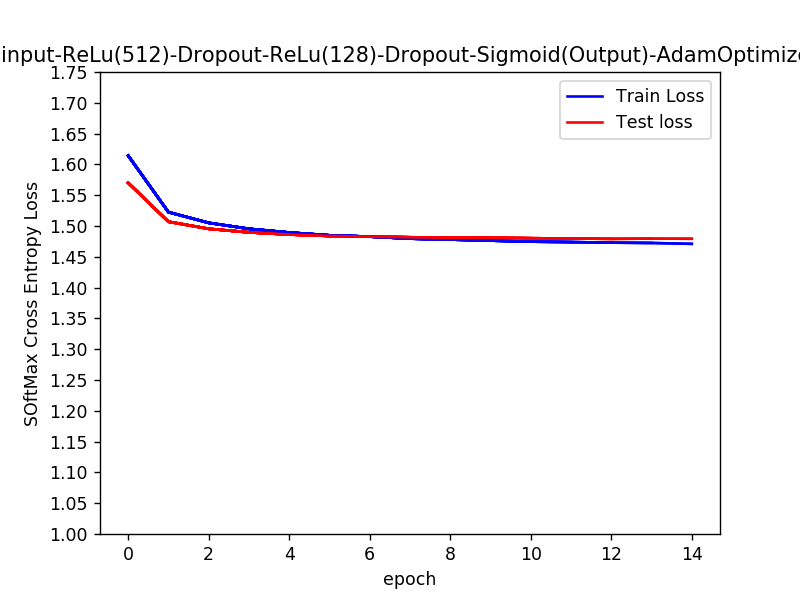

Epoch: 0001 train cost 1.614225241 test cost1.570058273
Epoch: 0002 train cost 1.522499226 test cost1.506984335
Epoch: 0003 train cost 1.505117878 test cost1.495442122
Epoch: 0004 train cost 1.495425777 test cost1.489701674
Epoch: 0005 train cost 1.489422205 test cost1.486143460
Epoch: 0006 train cost 1.484898707 test cost1.483825635
Epoch: 0007 train cost 1.482736018 test cost1.482709664
Epoch: 0008 train cost 1.479466682 test cost1.481718557
Epoch: 0009 train cost 1.477963467 test cost1.480906393
Epoch: 0010 train cost 1.476253543 test cost1.480964321
Epoch: 0011 train cost 1.474559704 test cost1.480201797
Epoch: 0012 train cost 1.473918354 test cost1.479706761
Epoch: 0013 train cost 1.472963773 test cost1.479124932
Epoch: 0014 train cost 1.472459095 test cost1.479519013
Epoch: 0015 train cost 1.470991946 test cost1.479275469
accuracy:  0.9793


In [44]:
ydrop = multilayer_perceptron_dropout(x, weights_relu, biases)

cost_drop = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ydrop, labels = y_))

optimizer_drop_adam = tf.train.AdamOptimizer(learning_rate).minimize(cost_drop)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch'); ax.set_ylabel('SOftMax Cross Entropy Loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
            
        # loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                
            # Using Adam Optimizer
            _, c, w = sess.run([optimizer_drop_adam, cost_drop, weights_relu], feed_dict = {x: batch_xs, y_: batch_ys, keep_prob: 0.5})
            train_avg_cost += c / total_batch
            c = sess.run(cost_drop, feed_dict = {x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})
            test_avg_cost += c / total_batch
                
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plot_dynamic(xs, ytrs, ytes, ax, np.arange(1, 1.8, step= 0.05), 'input-ReLu(512)-Dropout-ReLu(128)-Dropout-Sigmoid(Output)-AdamOptimizer')
            
        if epoch% display_step ==0:
            print("Epoch: "'%04d' %(epoch + 1), 'train cost {:.9f}'.format(train_avg_cost), 'test cost{:.9f}'.format(test_avg_cost))
                
    plot_dynamic(xs, ytrs, ytes, ax, np.arange(1, 1.8, step = 0.05), "input-ReLu(512)-Dropout-ReLu(128)-Dropout-Sigmoid(output)-AdamOptimizer")
        
    correct_prediction = tf.equal(tf.argmax(ydrop, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("accuracy: ", accuracy.eval({x: mnist.test.images, y_:mnist.test.labels, keep_prob: 1.0}))

<IPython.core.display.Javascript object>


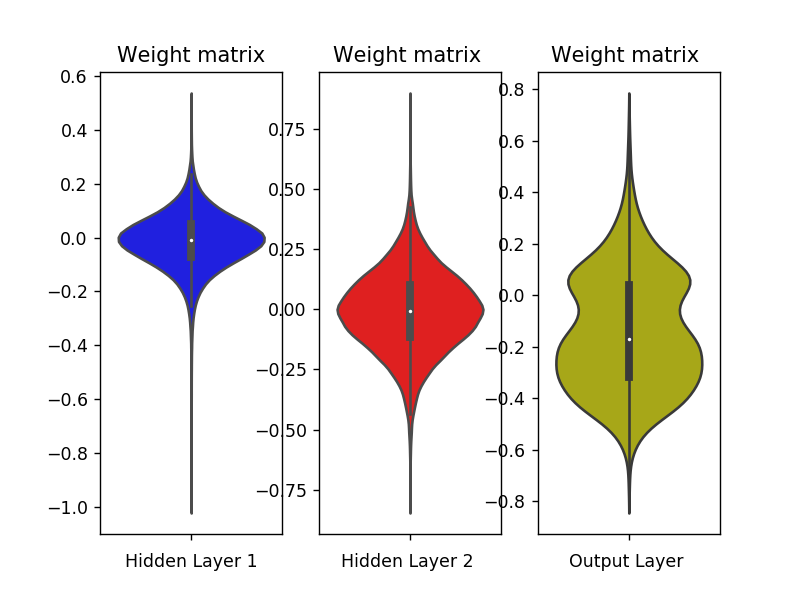

Text(0.5,0,'Output Layer ')

In [45]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')